In [126]:
# Impotação e instalação de Bibliotecas para modelagem dos dados

!pip install plotly
!pip install nbformat
!pip install --upgrade nbformat
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats

In [127]:
# Leitura e visualização das bases de dados
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("CCEE_BR_Data.csv.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall(
        path="")

table = pd.read_csv('CCEE_BR_Data.csv', encoding='UTF-8')
table

,Data,Classe,Ramo,Submercado,UF,Consumo,Covid
0,01/07/2018,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.01,0
1,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.00,0
2,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,0.68,0
3,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,SC,1.88,0
4,01/07/2018,Autoprodutor,ALIMENTÍCIOS,SUL,RS,0.04,0
...,...,...,...,...,...,...,...
418606,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,DF,689.19,1
418607,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,AC,121.34,1
418608,19/06/2020,Distribuidor,ACR,SUL,SC,2012.83,1
418609,19/06/2020,Distribuidor,ACR,SUL,RS,2310.67,1


In [128]:
# Especificação do número de linhas e colunas da tabela

print(f'QUANTIDADE DE LINHAS: {table.shape[0]}\n')
print(f'QUANTIDADE DE COLUNAS: {table.shape[1]}')

QUANTIDADE DE LINHAS: 418611

QUANTIDADE DE COLUNAS: 7


In [129]:
# Tipos de variáveis de cada coluna e quantidade de valores não-nulos da base geral

table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418611 entries, 0 to 418610
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Data        418611 non-null  object 
 1   Classe      418611 non-null  object 
 2   Ramo        418611 non-null  object 
 3   Submercado  418611 non-null  object 
 4   UF          418611 non-null  object 
 5   Consumo     418611 non-null  float64
 6   Covid       418611 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 22.4+ MB


In [130]:
# Quantidade de dados nulos em cada coluna da base geral

table.isnull().sum()

Data          0
Classe        0
Ramo          0
Submercado    0
UF            0
Consumo       0
Covid         0
dtype: int64

In [131]:
# Métricas estatísticas da tabela geral

table.describe()

,Consumo,Covid
count,418611.000000,418611.000000
mean,106.361081,0.130080
std,580.168023,0.336392
min,0.000000,0.000000
25%,1.620000,0.000000
50%,6.720000,0.000000
75%,30.255000,0.000000
max,14173.800000,1.000000


In [132]:
# Lista das classes de consumidores de energia

table['Classe'].unique().tolist()

['Autoprodutor',
 'Comercializador Varejista',
 'Consumidor Especial',
 'Consumidor Livre',
 'Distribuidor',
 'Exportador']

In [133]:
# Lista dos Ramos de consumidores de energia

table['Ramo'].unique().tolist()

['ALIMENTÍCIOS',
 'COMÉRCIO',
 'EXTRAÇÃO DE MINERAIS METÁLICOS',
 'MADEIRA PAPEL E CELULOSE',
 'MANUFATURADOS DIVERSOS',
 'METALURGIA E PRODUTOS DE METAL',
 'MINERAIS NÃO-METÁLICOS',
 'QUÍMICOS',
 'SERVIÇOS',
 'TÊXTEIS',
 'BEBIDAS',
 'SANEAMENTO',
 'TELECOMUNICAÇÕES',
 'TRANSPORTE',
 'VEÍCULOS',
 'ACR']

In [134]:
# Lista das submercados consumidores de energia

table['Submercado'].unique().tolist()

['NORDESTE', 'SUDESTE / CENTRO-OESTE', 'SUL', 'NORTE']

In [135]:
# Top 3 maiores Ramos Consumidores de Energia

table.groupby('Ramo')['Consumo'].sum().nlargest(3)

Ramo
ACR                               31044454.43
METALURGIA E PRODUTOS DE METAL     3375629.15
QUÍMICOS                           1411042.58
Name: Consumo, dtype: float64

In [136]:
# Consumo de Energia agrupado por estado (Jul/2018 - Jun/2020)

table.groupby('UF')['Consumo'].sum().sort_values(ascending=True)

UF
AC        88930.69
AP       153841.11
TO       224248.34
RO       322593.60
SE       339587.65
PI       391059.73
AL       407784.71
MS       509103.34
PB       517163.06
RN       522526.78
DF       593988.01
MA       720995.25
AM       753955.16
MT       803951.18
ES      1026721.42
CE      1158800.26
PE      1417378.47
GO      1486370.87
PA      1725883.96
SC      2263545.92
BA      2447270.38
RS      2761001.32
PR      2790061.68
RJ      4154876.09
MG      5072253.44
SP     11870026.25
Name: Consumo, dtype: float64

In [137]:
# Top 10 maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)

table_top10 = table.groupby('UF')['Consumo'].sum().nlargest(10)
table_top10

UF
SP     11870026.25
MG      5072253.44
RJ      4154876.09
PR      2790061.68
RS      2761001.32
BA      2447270.38
SC      2263545.92
PA      1725883.96
GO      1486370.87
PE      1417378.47
Name: Consumo, dtype: float64

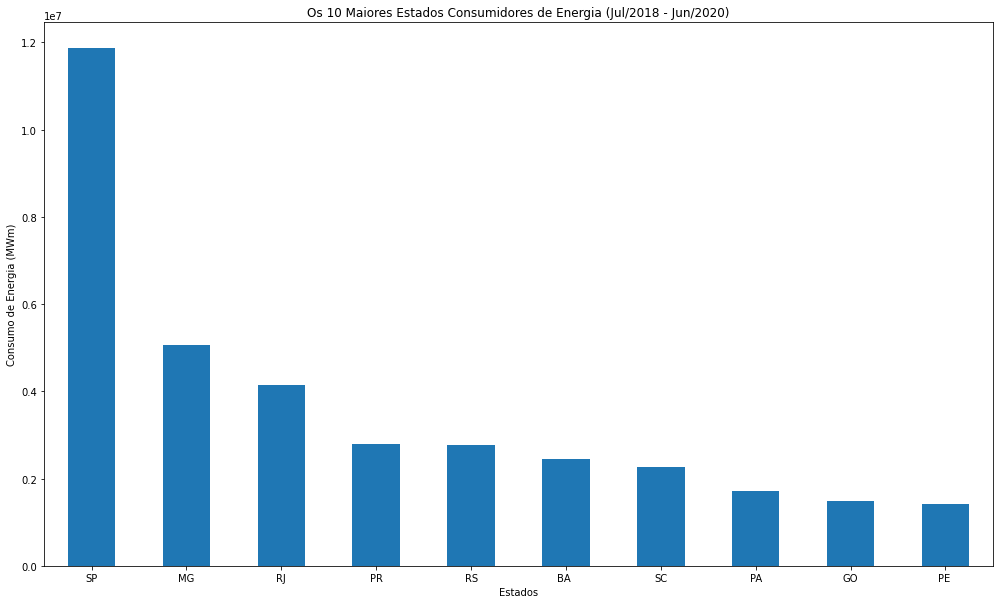

In [138]:
# Visualização Gráfica dos 10 maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)

table_top10_bar = table_top10.plot(kind='bar', rot=0, xlabel='Estados', 
                                   ylabel='Consumo de Energia (MWm)',
    title='Os 10 Maiores Estados Consumidores de Energia (Jul/2018 - Jun/2020)', 
    figsize=(17,10))

In [139]:
table.rename(columns={'Consumo':'MWm'}, inplace=True)
table_2019 = table.copy()
table_2019['Data'] = pd.to_datetime(table['Data'], format='%d/%m/%Y').dt.year
table_2019 = table_2019.loc[(table_2019['Data'] == 2019)].drop(columns='Covid')
table_2019

,Data,Classe,Ramo,Submercado,UF,MWm
102670,2019,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.01
102671,2019,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.24
102672,2019,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,0.19
102673,2019,Autoprodutor,ALIMENTÍCIOS,SUL,SC,0.15
102674,2019,Autoprodutor,ALIMENTÍCIOS,SUL,RS,0.11
...,...,...,...,...,...,...
312631,2019,Distribuidor,ACR,SUL,SC,2345.76
312632,2019,Distribuidor,ACR,SUL,RS,3569.17
312633,2019,Distribuidor,ACR,SUL,PR,2698.92
312634,2019,Exportador,SERVIÇOS,SUL,SC,0.00


In [140]:
agregado = table_2019.groupby(by='Classe').agg(set)
agregado['MWm'] = [sum(x) for x in agregado['MWm']]
agregado.sort_values(by='MWm', ascending=False, inplace=True)
agregado

,Data,Ramo,Submercado,UF,MWm
Classe,,,,,
Distribuidor,{2019},{ACR},"{NORTE, SUDESTE / CENTRO-OESTE, NORDESTE, SUL}","{PI, RJ, SP, TO, RO, MT, RN, PE , AP, AM, SC, ...",1.581386e+07
Consumidor Livre,{2019},"{TELECOMUNICAÇÕES, MANUFATURADOS DIVERSOS, MET...","{NORTE, SUDESTE / CENTRO-OESTE, NORDESTE, SUL}","{PI, RJ, SP, TO, RO, MT, PE , RN, AM, SC, MS, ...",3.400625e+06
Consumidor Especial,{2019},"{TELECOMUNICAÇÕES, MANUFATURADOS DIVERSOS, MET...","{NORTE, SUDESTE / CENTRO-OESTE, NORDESTE, SUL}","{PI, RJ, SP, TO, RO, MT, RN, PE , AP, AM, SC, ...",7.304708e+05
Autoprodutor,{2019},"{MANUFATURADOS DIVERSOS, METALURGIA E PRODUTOS...","{SUDESTE / CENTRO-OESTE, NORTE, NORDESTE, SUL}","{RJ, SP, MT, RN, PE , SC, MS, RS, GO, AL , PR,...",6.625548e+05
Comercializador Varejista,{2019},"{TELECOMUNICAÇÕES, MANUFATURADOS DIVERSOS, MET...","{SUDESTE / CENTRO-OESTE, NORDESTE, NORTE, SUL}","{RJ, SC, GO, MA, RS, ES, SP, CE, BA , PE , PR,...",3.478490e+03
Exportador,{2019},{SERVIÇOS},{SUL},"{SC, RS}",0.000000e+00


In [141]:
fig = px.bar(agregado, x=agregado.index, y='MWm', color_discrete_sequence=['darkslateblue'], title='Consumo por classe em 2019')
fig.show()

In [142]:
#descobrindo os dias com COVID
covid_days = list(set(table.loc[table['Covid'] == 1]['Data']))
covid = table[table['Data'].isin(covid_days)]
covid

,Data,Classe,Ramo,Submercado,UF,MWm,Covid
364158,25/03/2020,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.23,1
364159,25/03/2020,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.00,1
364160,25/03/2020,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,1.62,1
364161,25/03/2020,Autoprodutor,ALIMENTÍCIOS,SUL,RS,1.13,1
364162,25/03/2020,Autoprodutor,ALIMENTÍCIOS,SUL,PR,1.86,1
...,...,...,...,...,...,...,...
418606,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,DF,689.19,1
418607,19/06/2020,Distribuidor,ACR,SUDESTE / CENTRO-OESTE,AC,121.34,1
418608,19/06/2020,Distribuidor,ACR,SUL,SC,2012.83,1
418609,19/06/2020,Distribuidor,ACR,SUL,RS,2310.67,1


In [143]:
covid_days = [f'{x[:-2]}19' for x in covid_days]
no_covid = table[table['Data'].isin(covid_days)]
no_covid

,Data,Classe,Ramo,Submercado,UF,MWm,Covid
149800,25/03/2019,Autoprodutor,ALIMENTÍCIOS,NORDESTE,PE,0.20,0
149801,25/03/2019,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MG,0.02,0
149802,25/03/2019,Autoprodutor,ALIMENTÍCIOS,SUDESTE / CENTRO-OESTE,MT,1.01,0
149803,25/03/2019,Autoprodutor,ALIMENTÍCIOS,SUL,SC,2.51,0
149804,25/03/2019,Autoprodutor,ALIMENTÍCIOS,SUL,RS,1.36,0
...,...,...,...,...,...,...,...
199691,19/06/2019,Distribuidor,ACR,SUL,SC,2124.32,0
199692,19/06/2019,Distribuidor,ACR,SUL,RS,2685.83,0
199693,19/06/2019,Distribuidor,ACR,SUL,PR,2696.13,0
199694,19/06/2019,Exportador,SERVIÇOS,SUL,SC,0.00,0


In [144]:

print(f"2019: {'Normal' if stats.normaltest(no_covid['MWm']).pvalue > 0.05 else 'Não Normal'},\
 2020: {'Normal' if stats.normaltest(covid['MWm']).pvalue > 0.05 else 'Não Normal'}")
print(f"{'Diferença não significativa' if stats.mannwhitneyu(no_covid['MWm'], covid['MWm']).pvalue > 0.05 else 'Diferença significativa'}")
somas = [no_covid.sum()['MWm'], covid.sum()['MWm']]
fig = px.bar(x=['2019','2020'], y=somas, color_discrete_sequence=['darkslateblue'],
    title='Consumo de energia total no período de 25/03 a 19/06',
    labels={'x': 'Ano', 'y':'MWm'})
fig.show()

2019: Não Normal, 2020: Não Normal
Diferença significativa


In [145]:
#consumo por classe em 2019
agregado_no_covid = no_covid.groupby(by='Classe').agg(list)
consumo_classe_no_covid = agregado_no_covid.drop(['Data','Ramo','Submercado','UF','Covid'], axis=1)
consumo_classe_no_covid['MWm'] = [sum(x) for x in consumo_classe_no_covid['MWm']]
consumo_classe_no_covid

,MWm
Classe,
Autoprodutor,192823.11
Comercializador Varejista,2745.61
Consumidor Especial,362840.70
Consumidor Livre,1092551.03
Distribuidor,3766007.69
Exportador,0.00


In [146]:
#consumo por classe em 2020
agregado_covid = covid.groupby(by='Classe').agg(list)
consumo_classe_covid = agregado_covid.drop(['Data','Ramo','Submercado','UF','Covid'], axis=1)
consumo_classe_covid['MWm'] = [sum(x) for x in consumo_classe_covid['MWm']]
consumo_classe_covid

,MWm
Classe,
Autoprodutor,166750.43
Comercializador Varejista,4790.91
Consumidor Especial,266479.58
Consumidor Livre,1045539.92
Distribuidor,3393386.44
Exportador,0.00


In [147]:
classe = pd.DataFrame({
    '2019' : consumo_classe_no_covid.loc['Autoprodutor'],
    '2020' : consumo_classe_covid.loc['Autoprodutor']
}).T

fig = px.bar(x=classe.index, y=classe['MWm'], color_discrete_sequence=['darkslateblue'],
    title='Consumo de energia da classe "Autoprodutor" no período de 25/03 a 19/06',
    labels={'x': 'Ano', 'y':'MWm'})
fig.show()

In [148]:
classe = pd.DataFrame({
    '2019' : consumo_classe_no_covid.loc['Consumidor Especial'],
    '2020' : consumo_classe_covid.loc['Consumidor Especial']
}).T

fig = px.bar(x=classe.index, y=classe['MWm'], color_discrete_sequence=['darkslateblue'],
    title='Consumo de energia da classe "Consumidor Especial" no período de 25/03 a 19/06',
    labels={'x': 'Ano', 'y':'MWm'})
fig.show()

In [149]:
classe = pd.DataFrame({
    '2019' : consumo_classe_no_covid.loc['Consumidor Livre'],
    '2020' : consumo_classe_covid.loc['Consumidor Livre']
}).T

fig = px.bar(x=classe.index, y=classe['MWm'], color_discrete_sequence=['darkslateblue'],
    title='Consumo de energia da classe "Consumidor Livre" no período de 25/03 a 19/06',
    labels={'x': 'Ano', 'y':'MWm'})
fig.show()

In [150]:
classe = pd.DataFrame({
    '2019' : consumo_classe_no_covid.loc['Distribuidor'],
    '2020' : consumo_classe_covid.loc['Distribuidor']
}).T

fig = px.bar(x=classe.index, y=classe['MWm'], color_discrete_sequence=['darkslateblue'],
    title='Consumo de energia da classe "Distribuidor" no período de 25/03 a 19/06',
    labels={'x': 'Ano', 'y':'MWm'})
fig.show()

In [151]:
classe = pd.DataFrame({
    '2019' : consumo_classe_no_covid.loc['Comercializador Varejista'],
    '2020' : consumo_classe_covid.loc['Comercializador Varejista']
}).T

fig = px.bar(x=classe.index, y=classe['MWm'], color_discrete_sequence=['darkslateblue'],
    title='Consumo de energia da classe "Comercializador Varejista" no período de 25/03 a 19/06',
    labels={'x': 'Ano', 'y':'MWm'})
fig.show()

In [184]:
#deferença de consumo por estado nos períodos prévios
estados_no_covid = no_covid.drop(['Covid'],axis=1).groupby(by='UF')\
    .agg(sum).sort_values(by='MWm')
estados_covid = covid.drop(['Covid'],axis=1).groupby(by='UF')\
    .agg(sum).sort_values(by='MWm')
diferencas = pd.DataFrame(data=[estados_covid.loc[estado] - estados_no_covid.loc[estado] for estado in estados_covid.index],
    index=estados_covid.index, columns=['MWm']).sort_values(by='MWm')
fig = px.bar(x=diferencas.index, y=diferencas['MWm'], color_discrete_sequence=['darkslateblue'],
    title='Diferença de consumo de energia no período de 25/03 a 19/06 entre 2020 e 2019',
    labels={'x': 'Estados', 'y':'MWm'})
fig.show()